In [1]:
# mount drive and change directory to project folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/520 Final Project"

/content/drive/.shortcut-targets-by-id/1KHBlsdIi36o_ikonJZ-usBVzGPrZlH0V/520 Final Project


#Load Data

In [3]:
import numpy as np
with open('X_train_spec.npy', 'rb') as f:
  X_test = np.load(f, allow_pickle=True)
with open('y_train_spec.npy', 'rb') as f:
  y_test = np.load(f, allow_pickle=True)
X_test.shape

(326580, 84, 32)

# Baseline Model

In [4]:
# get predictions
import librosa
THRESHOLD = -10 # in decibels
y_pred = []
for i in range(len(X_test)):
  C = X_test[i]
  dbc = librosa.amplitude_to_db(C, ref=np.max)
  sums = np.mean(dbc, axis=1)
  pred = (sums > THRESHOLD)
  y_pred += [pred]
y_pred = np.array(y_pred)

In [5]:
# midi index 24 = cqt index 0, so midi note 40 = cqt index 16
y_pred_trunc = y_pred[:,16:61]
y_test_trunc = y_test[:,40:85]

In [6]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
precisions = []
recalls = []
accuracies = []
for i in range(len(y_pred_trunc[0])):
  recalls += [recall_score(y_test_trunc[:,i], y_pred_trunc[:,i])]
  precisions += [precision_score(y_test_trunc[:,i], y_pred_trunc[:,i])]
  accuracies += [accuracy_score(y_test_trunc[:,i], y_pred_trunc[:,i])]
print(recalls)
print(precisions)
print(accuracies)

[0.2794506740582084, 0.3118572292800968, 0.4286842520928763, 0.39694803940506085, 0.34759358288770054, 0.28796692129791857, 0.2674570088587806, 0.2685432338429184, 0.24556962025316456, 0.356858934723081, 0.37298800784277963, 0.388118229498554, 0.3453533397870281, 0.35852320675105487, 0.31009224091155724, 0.24737072743207714, 0.3024336888159694, 0.3478639055234017, 0.3534364261168385, 0.33307538793630104, 0.3106255976355365, 0.3550848633399621, 0.3400154627788823, 0.3699122528808542, 0.3441380627905496, 0.36579851971137467, 0.36949120925243667, 0.3348548887010426, 0.3608921118090982, 0.30282101167315173, 0.43098336353154343, 0.37756951505238495, 0.33155750548417423, 0.3076197347244575, 0.250272509265315, 0.25271826892022825, 0.18981633707548498, 0.18161813622639578, 0.19100754840827042, 0.15450643776824036, 0.1647887323943662, 0.1444565069887366, 0.14165541593104164, 0.10666976528003719, 0.09437263096510837]
[0.2979580870499731, 0.3339451522349385, 0.22743652057320038, 0.390511180084879

In [9]:
print(np.mean(recalls))
print(np.mean(precisions))

0.29607624546453426
0.35321395136477335


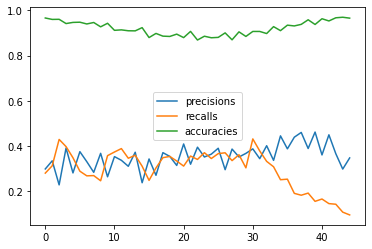

In [7]:
import matplotlib.pyplot as plt
plt.plot(precisions, label='precisions')
plt.plot(recalls, label='recalls')
plt.plot(accuracies, label='accuracies')
plt.legend()
plt.show()

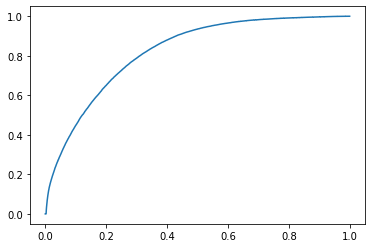

In [8]:
# ROC curve for middle C: MIDI 60, so index 36
from sklearn.metrics import roc_curve
y_scores = []
for i in range(len(X_test)):
  C = X_test[i]
  dbc = librosa.amplitude_to_db(C, ref=np.max)
  score = np.mean(dbc, axis=1)
  y_scores += [score]
y_scores = np.array(y_scores)
fpr, tpr, thresholds = roc_curve(y_test[:,60], y_scores[:,36])
plt.plot(fpr, tpr)
plt.show()

In [13]:
# get AUC
from sklearn.metrics import auc
print(auc(fpr, tpr))

0.6267042707493957


In [16]:
import pickle
with open('baseline_fpr.npy', 'wb') as f:
  np.save(f, fpr, allow_pickle=True)
with open('baseline_tpr.npy', 'wb') as f:
  np.save(f, tpr, allow_pickle=True)

In [14]:
# get the average AUC over all the notes
aucs = []
for i in range(45):
  fpr, tpr, _ = roc_curve(y_test[:,40+i], y_scores[:,16+i])
  aucs += [auc(fpr,tpr)]
print(np.mean(aucs))

0.8344931495433564


# Even more baseline baseline: always predict false

In [ ]:
y_zero = np.zeros(y_pred_trunc.shape)
precisions = []
recalls = []
accuracies = []
for i in range(len(y_pred_trunc[0])):
  recalls += [recall_score(y_test_trunc[:,i], y_zero[:,i])]
  precisions += [precision_score(y_test_trunc[:,i], y_zero[:,i], zero_division=0)]
  accuracies += [accuracy_score(y_test_trunc[:,i], y_zero[:,i])]
print(recalls)
print(precisions)
print(accuracies)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.9756966133872251, 0.969630718353849, 0.980614244595505, 0.9524435054198053, 0.9656439463531141, 0.9563077959458632, 0.9529916100189846, 0.9621440382142201, 0.9383152673158185, 0.9653346806295547, 0.9328464694714924, 0.937531385877886, 0.9367383183293527, 0.9274297262539041, 0.9548533284340743, 0.902174046175516, 0.9328127870659563, 0.9084726560107784, 0.9108947271725152, 0.9248178088064181, 0.89432604568559, 0.933789576826505, 0.8891052728274849, 0.9131085798273011, 0.9038336701573887, 0.9011237675301611, 0.9343407434625512, 0.891328311592

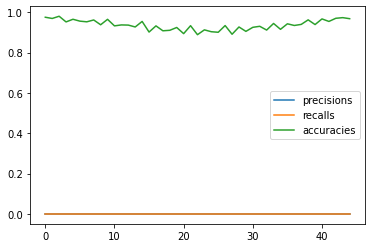

In [ ]:
import matplotlib.pyplot as plt
plt.plot(precisions, label='precisions')
plt.plot(recalls, label='recalls')
plt.plot(accuracies, label='accuracies')
plt.legend()
plt.show()
# accuracies actually go down in predicting nonzero. So precision and recall the way to go